In [1]:
# Installing required libraries
!pip install yFinance statsmodels matplotlib pandas

In [2]:
# Importing important libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Getting the data for tesla
tesla_data = yf.download('TSLA', start = "2022-07-01", end = "2025-06-30", interval = "1mo")
tesla_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2022-07-01,297.149994,298.320007,216.166672,227.000000,1744884000
2022-08-01,275.609985,314.666656,271.809998,301.276672,1695263200
2022-09-01,265.250000,313.799988,262.470001,272.579987,1299271000
2022-10-01,227.539993,257.500000,198.589996,254.500000,1735263100
2022-11-01,194.699997,237.399994,166.190002,234.050003,1885275300


In [4]:
# Getting the data for Apple
apple_data = yf.download('AAPL', start = "2022-07-01", end = "2025-06-30", interval = "1mo")
apple_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-07-01,159.943970,161.046295,133.517939,133.891929,1447125400
2022-08-01,154.737488,173.368575,154.658749,158.467637,1510239600
2022-09-01,136.206772,161.890912,136.009659,154.380819,2084722800
2022-10-01,151.128372,155.228376,132.431975,136.216603,1868139700
2022-11-01,145.894974,153.207954,132.441853,152.843295,1724847700


In [5]:
# Keep only closing price and remove missing values
tesla = tesla_data[['Close']].copy()
tesla.columns = ['Price']
tesla.dropna(inplace = True)
print(tesla.head())

apple = apple_data[['Close']].copy()
apple.columns = ['Price']
apple.dropna(inplace = True)
print(apple.head())

                 Price
Date                  
2022-07-01  297.149994
2022-08-01  275.609985
2022-09-01  265.250000
2022-10-01  227.539993
2022-11-01  194.699997
                 Price
Date                  
2022-07-01  159.943970
2022-08-01  154.737488
2022-09-01  136.206772
2022-10-01  151.128372
2022-11-01  145.894974


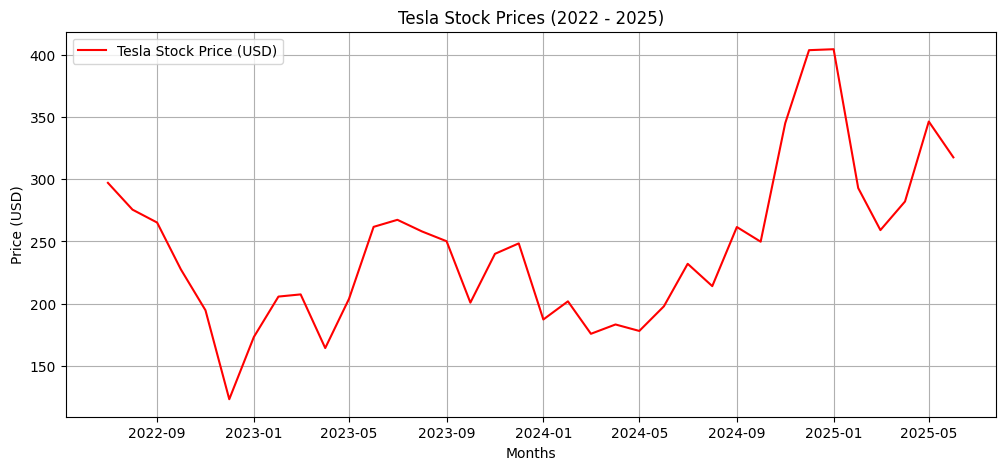

In [6]:
# Plot
plt.figure(figsize = (12, 5))
plt.plot(tesla, label = 'Tesla Stock Price (USD)', color ='red')
plt.title('Tesla Stock Prices (2022 - 2025)')
plt.xlabel('Months')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

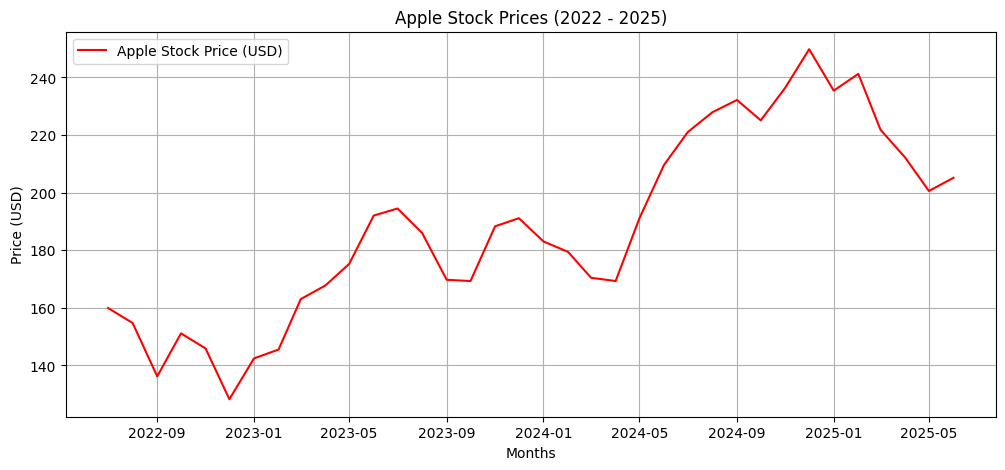

In [7]:
# Plot
plt.figure(figsize = (12, 5))
plt.plot(apple, label = 'Apple Stock Price (USD)', color ='red')
plt.title('Apple Stock Prices (2022 - 2025)')
plt.xlabel('Months')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

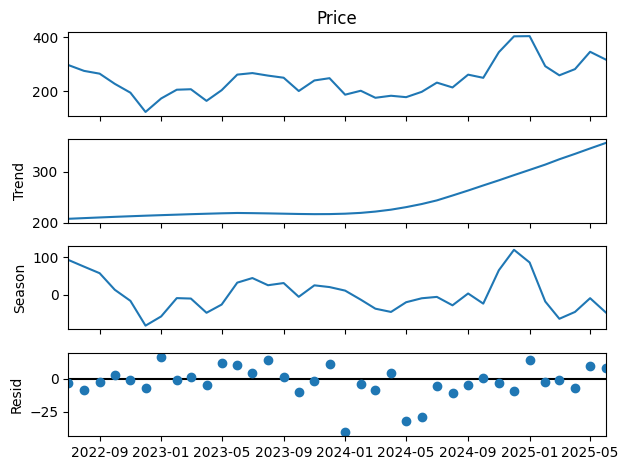

In [8]:
# STL Decompostion
stl_tesla = STL(tesla['Price'], period = 12)
result = stl_tesla.fit()
result.plot()
plt.show()

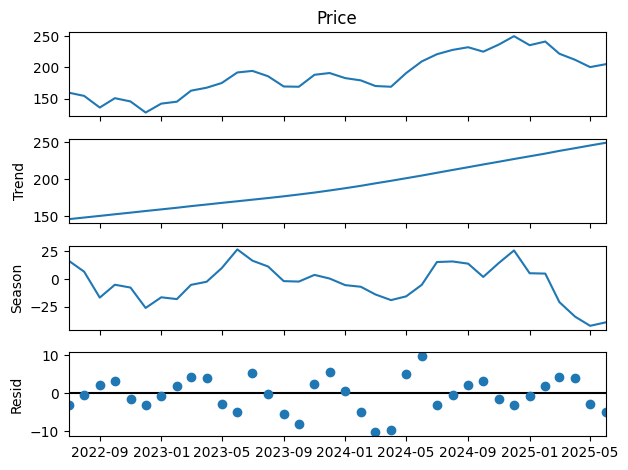

In [9]:
# STL Decompostion
stl_apple = STL(apple['Price'], period = 12)
result = stl_apple.fit()
result.plot()
plt.show()

In [10]:
# ADF Test for Stationarity
adf_result_tesla = adfuller(tesla['Price'])
print('ADF Statistic:', adf_result_tesla[0])
print('p-value:', adf_result_tesla[1])
if adf_result_tesla[1] <= 0.05:
    print('\nThe series is stationary.')
else:
    print('\nThe series is not stationary.')

ADF Statistic: -1.974846836011065
p-value: 0.2977095996567656

The series is not stationary.


In [11]:
# ADF Test for Stationarity
adf_result_apple = adfuller(apple['Price'])
print('ADF Statistic:', adf_result_apple[0])
print('p-value:', adf_result_apple[1])
if adf_result_apple[1] <= 0.05:
    print('\nThe series is stationary.')
else:
    print('\nThe series is not stationary.')

ADF Statistic: -1.4117585951677019
p-value: 0.5766260986327478

The series is not stationary.


In [ ]:
'''
Since, the data that we are working with is not stationary,
hence we cannot use AR, MA and ARMA models.
'''

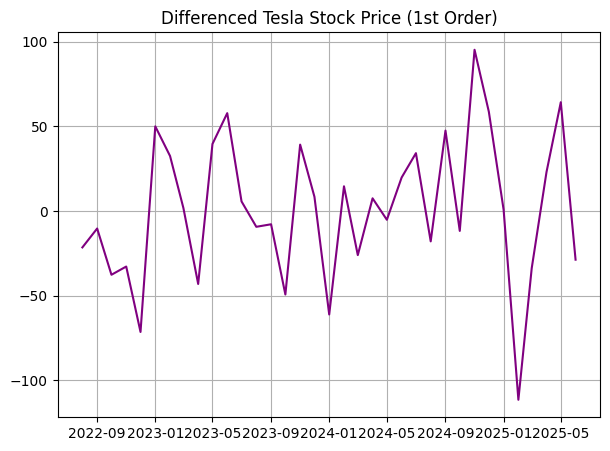

In [12]:
# Differencing to make series stationary
tesla_diff = tesla['Price'].diff().dropna()

plt.figure(figsize = (7, 5))
plt.plot(tesla_diff, label = 'Tesla Stock Price (USD)', color = 'Purple')
plt.title('Differenced Tesla Stock Price (1st Order)')
plt.grid(True)
plt.show()

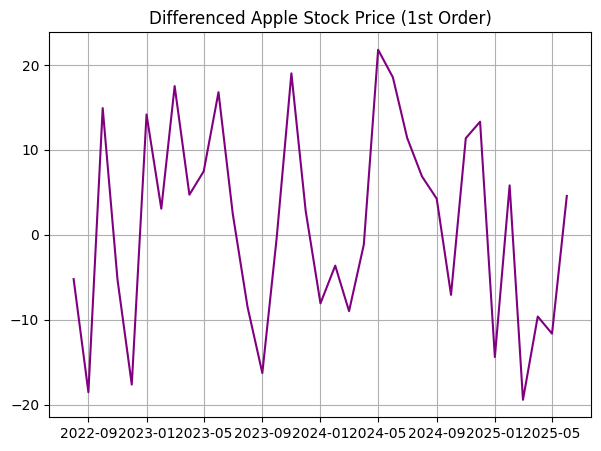

In [13]:
# Differencing to make series stationary
apple_diff = apple['Price'].diff().dropna()

plt.figure(figsize = (7, 5))
plt.plot(apple_diff, label = 'Apple Stock Price (USD)', color = 'Purple')
plt.title('Differenced Apple Stock Price (1st Order)')
plt.grid(True)
plt.show()

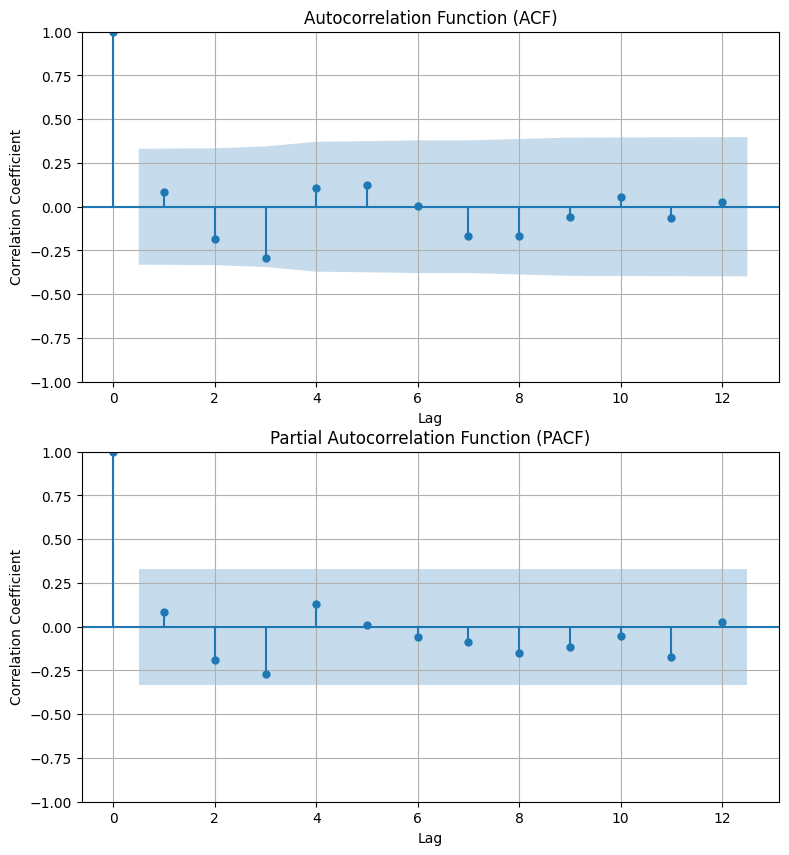

In [18]:
# ACF and PACF Plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (9, 10))

# ACF Plot
plot_acf(tesla_diff, ax = ax1, lags = 12, alpha = 0.05)
ax1.set_title('Autocorrelation Function (ACF)')
ax1.set_ylabel('Correlation Coefficient')
ax1.set_xlabel('Lag')
ax1.grid(True)

# PACF Plot
plot_pacf(tesla_diff, ax = ax2, lags = 12, alpha = 0.05)
ax2.set_title('Partial Autocorrelation Function (PACF)')
ax2.set_ylabel('Correlation Coefficient')
ax2.set_xlabel('Lag')
ax2.grid(True)

plt.show()

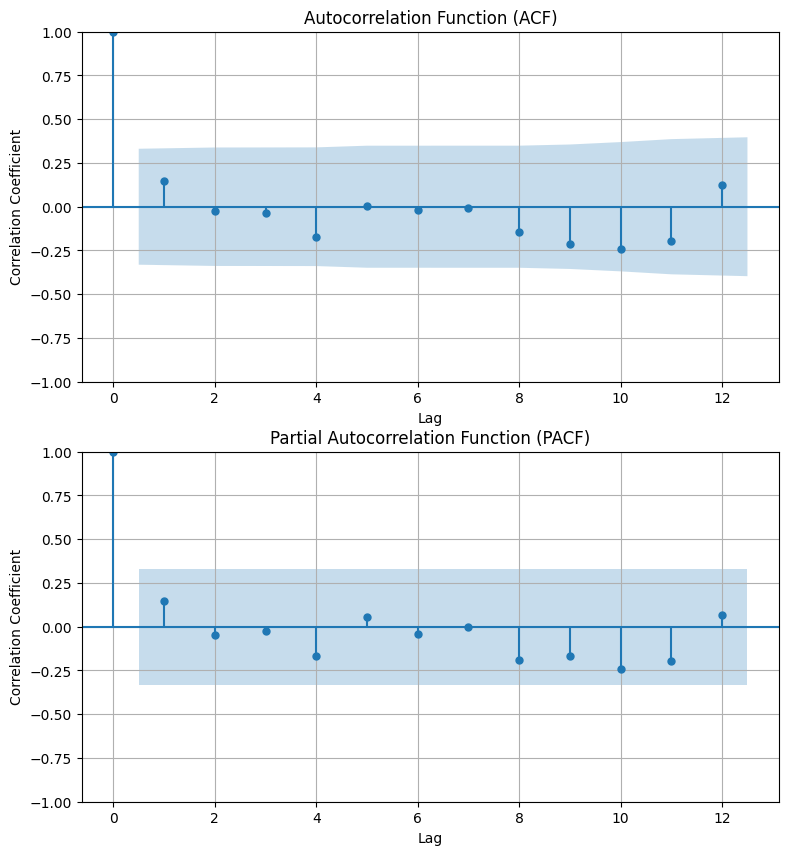

In [19]:
# ACF and PACF Plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (9, 10))

# ACF Plot
plot_acf(apple_diff, ax = ax1, lags = 12, alpha = 0.05)
ax1.set_title('Autocorrelation Function (ACF)')
ax1.set_ylabel('Correlation Coefficient')
ax1.set_xlabel('Lag')
ax1.grid(True)

# PACF Plot
plot_pacf(apple_diff, ax = ax2, lags = 12, alpha = 0.05)
ax2.set_title('Partial Autocorrelation Function (PACF)')
ax2.set_ylabel('Correlation Coefficient')
ax2.set_xlabel('Lag')
ax2.grid(True)

plt.show()

In [ ]:
'''

Based on the charts, the conclusions can be drawn as follows:

1. Autocorrelation Function (ACF) Conclusion:
	•	Chart show that the autocorrelation of the data is quite low beyond the first lag.
	•	The values drop quickly after lag 1, indicating little to no correlation between the observations at larger lags.
	•	The confidence bands for the ACF plot do not show any significant positive or negative correlation beyond the first lag, which suggests that the time series data is fairly random or that there is no strong autocorrelation present.

2. Partial Autocorrelation Function (PACF) Conclusion:
	•	Chart demonstrate that the partial autocorrelation also shows a sharp decline after the first few lags.
	•	The PACF plot shows a clear positive spike at lag 1 and no significant correlation for higher lags, indicating that only the first lag is relevant for explaining the variance in the data.
	•	This suggests that a simple autoregressive (AR) model with one lag may be appropriate if you’re considering AR or ARIMA-based time series models.

Both charts suggest that the time series data may have no significant dependencies beyond lag 1, pointing towards a simple time series model for forecasting.

'''

In [20]:
# Fitting the ARIMA Model (Basic)
model_arima_tesla = ARIMA(tesla['Price'], order = (1, 1, 1))
model_arima_tesla_fit = model_arima_tesla.fit()
print('\nARIMA Model Summary for Tesla :\n')
print(model_arima_tesla_fit.summary())


ARIMA Model Summary :

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -180.004
Date:                Sat, 26 Jul 2025   AIC                            366.007
Time:                        17:44:35   BIC                            370.673
Sample:                    07-01-2022   HQIC                           367.618
                         - 06-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8255      0.265      3.113      0.002       0.306       1.345
ma.L1         -0.9981      5.478     -0.182      0.855     -11.736       9.740
sigma2      1648.9159   8842

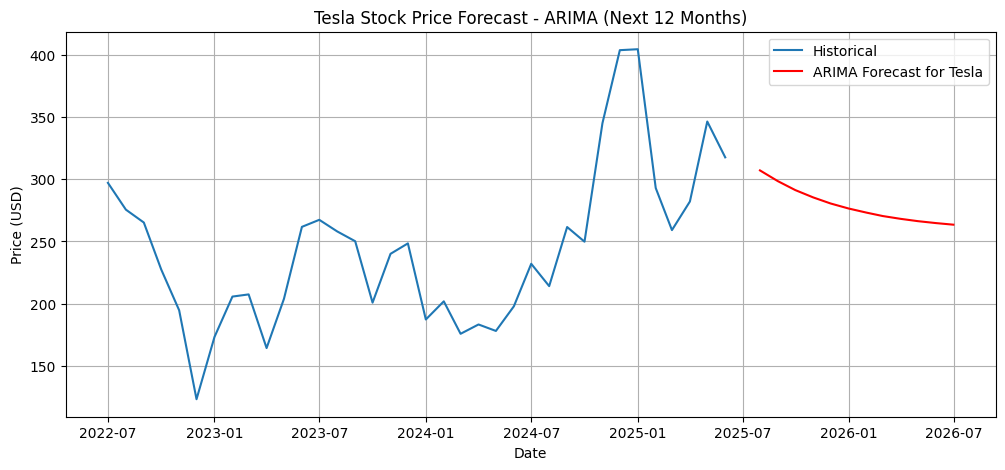

In [21]:
# Forecasting using ARIMA
forecast_arima_tesla = model_arima_tesla_fit.forecast(steps = 12)
forecast_index_tesla = pd.date_range(start = tesla.index[-1] + pd.DateOffset(months = 1), periods =  12, freq = 'M')

# Plot
plt.figure(figsize = (12, 5))
plt.plot(tesla['Price'], label = 'Historical')
plt.plot(forecast_index_tesla, forecast_arima_tesla, label = 'ARIMA Forecast for Tesla', color = 'red')
plt.title('Tesla Stock Price Forecast - ARIMA (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# SARIMA
model_sarima_tesla = SARIMAX(tesla['Price'], order = (1, 1, 1), seasonal_order = (1, 1, 1, 10))
model_sarima_tesla_fit = model_sarima_tesla.fit()
print('\nSARIMA Model Summary :\n')
print(model_sarima_tesla_fit.summary())


SARIMA Model Summary :

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 10)   Log Likelihood                -134.052
Date:                            Sat, 26 Jul 2025   AIC                            278.104
Time:                                    17:50:46   BIC                            284.198
Sample:                                07-01-2022   HQIC                           279.794
                                     - 06-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0132      2.343      0.006      0.996      -4.579       4.606
ma.L1     

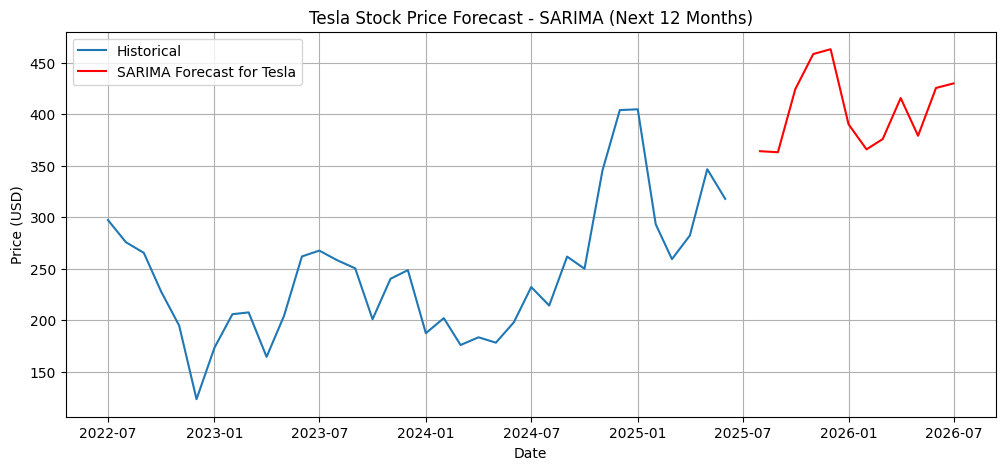

In [23]:
# Forecasting using SARIMA
forecast_sarima_tesla = model_sarima_tesla_fit.forecast(steps = 12)
forecast_index_tesla = pd.date_range(start = tesla.index[-1] + pd.DateOffset(months = 1), periods = 12, freq = 'M')

# Plot
plt.figure(figsize = (12, 5))
plt.plot(tesla['Price'], label = 'Historical')
plt.plot(forecast_index_tesla, forecast_sarima_tesla, label = 'SARIMA Forecast for Tesla', color = 'red')
plt.title('Tesla Stock Price Forecast - SARIMA (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Here are the detailed conclusions for chart:

1. Tesla Stock Price Forecast - ARIMA

	•	Analysis: The ARIMA model has been used to predict the Tesla stock price for the next 12 months.

	•	Historical Trend: The historical data shows significant fluctuations, with a sharp increase in early 2025 and a subsequent decline.

	•	Forecast: The ARIMA model predicts a downward trend, with the stock price approaching a value lower than the current level in 2025, continuing into 2026.

	•	Conclusion: The ARIMA model suggests that Tesla’s stock price is expected to decrease over the next 12 months, indicating potential challenges in its stock performance.

2. Tesla Stock Price Forecast - SARIMA

	•	Analysis: The SARIMA model forecasts Tesla’s stock price with seasonal adjustments over the next 12 months.

	•	Historical Trend: The historical trend shows sharp volatility, with significant price surges and drops.

	•	Forecast: SARIMA suggests a slight upward trend in the stock price after the dip in 2025, moving towards a higher value by mid-2026.
  
	•	Conclusion: The SARIMA model projects that Tesla’s stock will gradually rise, especially after 2025, indicating a potential recovery or growth in the stock price.

⸻

In summary, Tesla’s ARIMA forecast suggests a decline, whereas SARIMA projects a recovery.


In [24]:
# Fitting the ARIMA Model (Basic)
model_arima_apple = ARIMA(apple['Price'], order = (1, 1, 1))
model_arima_apple_fit = model_arima_apple.fit()
print('\nARIMA Model Summary for Apple :\n')
print(model_arima_apple_fit.summary())


ARIMA Model Summary for Apple :

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -134.933
Date:                Sat, 26 Jul 2025   AIC                            275.865
Time:                        17:56:29   BIC                            280.531
Sample:                    07-01-2022   HQIC                           277.476
                         - 06-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7483      0.230     -3.257      0.001      -1.199      -0.298
ma.L1          0.9997     25.926      0.039      0.969     -49.815      51.815
sigma2       124.1

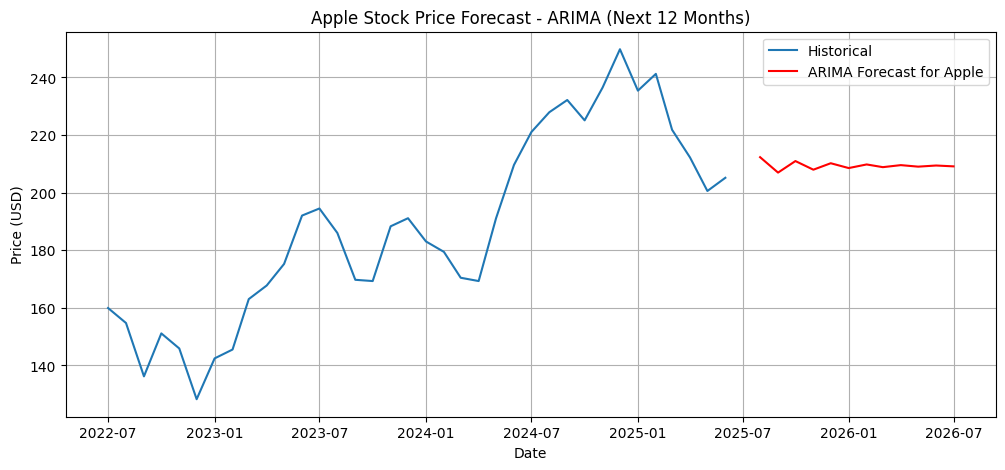

In [25]:
# Forecasting using ARIMA
forecast_arima_apple = model_arima_apple_fit.forecast(steps = 12)
forecast_index_apple = pd.date_range(start = apple.index[-1] + pd.DateOffset(months = 1), periods =  12, freq = 'M')

# Plot
plt.figure(figsize = (12, 5))
plt.plot(apple['Price'], label = 'Historical')
plt.plot(forecast_index_apple, forecast_arima_apple, label = 'ARIMA Forecast for Apple', color = 'red')
plt.title('Apple Stock Price Forecast - ARIMA (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# SARIMA
model_sarima_apple = SARIMAX(apple['Price'], order = (1, 1, 1), seasonal_order = (1, 1, 1, 10))
model_sarima_apple_fit = model_sarima_apple.fit()
print('\nSARIMA Model Summary :\n')
print(model_sarima_apple_fit.summary())


SARIMA Model Summary :

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 10)   Log Likelihood                -102.782
Date:                            Sat, 26 Jul 2025   AIC                            215.564
Time:                                    17:56:40   BIC                            221.659
Sample:                                07-01-2022   HQIC                           217.255
                                     - 06-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0488      0.618      0.079      0.937      -1.162       1.260
ma.L1     

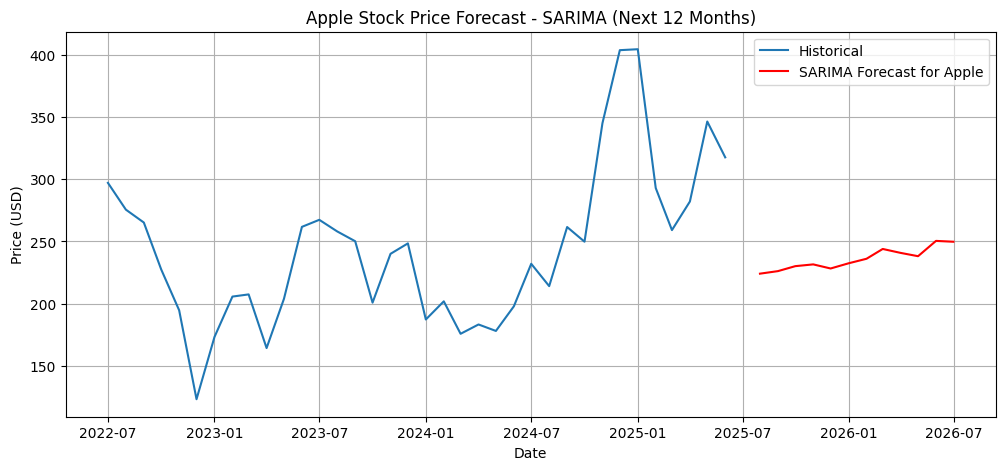

In [27]:
# Forecasting using SARIMA
forecast_sarima_apple = model_sarima_apple_fit.forecast(steps = 12)
forecast_index_apple = pd.date_range(start = apple.index[-1] + pd.DateOffset(months = 1), periods = 12, freq = 'M')

# Plot
plt.figure(figsize = (12, 5))
plt.plot(tesla['Price'], label = 'Historical')
plt.plot(forecast_index_apple, forecast_sarima_apple, label = 'SARIMA Forecast for Apple', color = 'red')
plt.title('Apple Stock Price Forecast - SARIMA (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

'''
Here are the detailed conclusions for each chart:

1. Apple Stock Price Forecast - ARIMA

	•	Analysis: The ARIMA model forecasts Apple’s stock price for the next 12 months.

	•	Historical Trend: The stock price shows steady fluctuations, with notable peaks and troughs, especially in 2024.

	•	Forecast: The ARIMA model predicts a flat trend for the stock price, with no significant changes in the upcoming months. The stock price stabilizes near 2025 levels.

	•	Conclusion: The ARIMA model suggests that Apple’s stock price is likely to remain stable with no substantial growth or decline in the next 12 months.

2. Apple Stock Price Forecast - SARIMA

	•	Analysis: The SARIMA model provides a seasonal forecast for Apple’s stock price for the next 12 months.

	•	Historical Trend: The historical price shows similar volatility as in the ARIMA model, with significant fluctuations.

	•	Forecast: The SARIMA model predicts a gradual increase in the stock price, continuing its upward trend into mid-2026.

	•	Conclusion: The SARIMA model forecasts positive growth for Apple’s stock price, suggesting that it will recover and continue to rise after the 2025 dip.

⸻

In summary, Apple, ARIMA predicts stability, while SARIMA forecasts gradual growth.


In [29]:
# Model Comparison
print("Model Comparison for Tesla :")
print(f"ARIMA Model AIC: {model_arima_tesla_fit.aic}")
print(f"SARIMA Model AIC: {model_sarima_tesla_fit.aic}")

# Select model based on lesser AIC
if model_arima_tesla_fit.aic < model_sarima_tesla_fit.aic:
    print("\nARIMA model is selected.")
else:
    print("\nSARIMA model is selected.")


Model Comparison for Tesla :
ARIMA Model AIC: 366.0074418396953
SARIMA Model AIC: 278.103687145206

SARIMA model is selected.


In [30]:
# Model Comparison
print("Model Comparison for Apple:")
print(f"ARIMA Model AIC: {model_arima_apple_fit.aic}")
print(f"SARIMA Model AIC: {model_sarima_apple_fit.aic}")

# Select model based on lesser AIC
if model_arima_apple_fit.aic < model_sarima_apple_fit.aic:
    print("\nARIMA model is selected.")
else:
    print("\nSARIMA model is selected.")

Model Comparison for Apple:
ARIMA Model AIC: 275.86537911773485
SARIMA Model AIC: 215.5642283744168

SARIMA model is selected.


In [31]:
# Saving the model in pickle file format
import pickle
with open('arima_tesla_model_2022_2025.pkl', 'wb') as file:
    pickle.dump(model_arima_tesla_fit, file)

In [32]:
# Saving the model in pickle file format
import pickle
with open('sarima_tesla_model_2022_2025.pkl', 'wb') as file:
    pickle.dump(model_sarima_tesla_fit, file)

In [33]:
# Saving the model in pickle file format
import pickle
with open('arima_apple_model_2022_2025.pkl', 'wb') as file:
    pickle.dump(model_arima_apple_fit, file)

In [34]:
# Saving the model in pickle file format
import pickle
with open('sarima_apple_model_2022_2025.pkl', 'wb') as file:
    pickle.dump(model_sarima_apple_fit, file)